In [1]:
install.packages('randomForest')
require(randomForest)
library(rpart)
library(purrr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
sd = sample(1:10000,1)
print(sd)

set.seed(sd)

# Test Set
ta <- runif(100, min = 0, max = 1)
tb <- runif(100, min = 0, max = 1)
tc <- runif(100, min = 0, max = 1)

test <- data.frame(cbind(ta,tb,tc))
colnames(test) <- c('A','B', 'C')

# Train Set
a <- runif(10000, min = 0, max = 1)
b <- runif(10000, min = 0, max = 1)
c <- runif(10000, min = 0, max = 1)

train <- data.frame(cbind(a,b,c))
colnames(train) <- c('A','B', 'C')

train$I <- train$A + train$B + train$C

eq <- I~A+B+C

[1] 6175


In [3]:
set.seed(sd)
ntree = 50
model <- randomForest(eq,data=train,ntree=ntree,keep.inbag=T)

In [4]:
print(model)


Call:
 randomForest(formula = eq, data = train, ntree = ntree, keep.inbag = T) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 1

          Mean of squared residuals: 0.001729179
                    % Var explained: 99.32


In [5]:
## INBAG: n by ntree matrix be returned that keeps track of which samples are “in-bag” in which trees
## But not how many times, if sampling with replacement (Default replace = TRUE)
print(model$inbag) ## 0 means OOB and 1-5 means which # of tree

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
1        0    2    1    2    1    2    1    1    0     3     0     0     2
2        1    2    0    0    1    1    0    0    1     0     1     0     1
3        2    2    0    0    2    0    2    1    1     1     4     0     2
4        1    1    1    0    1    2    1    0    2     0     0     1     2
5        2    1    0    1    1    1    1    0    1     1     1     1     0
6        4    0    0    0    4    2    0    0    2     0     1     1     3
7        1    4    1    2    0    0    1    1    0     3     1     0     0
8        1    0    0    0    2    0    2    1    0     0     1     2     3
9        3    1    3    1    2    0    0    1    1     2     0     1     0
10       1    5    1    0    4    0    1    2    0     1     0     0     0
11       0    1    1    0    0    0    1    1    1     2     1     3     1
12       1    0    1    1    3    1    0    1    1     1     0     1     0
13       1    1    0    1

In [6]:
outbag <- lapply(1:ntree, function(x) which(model[["inbag"]][ ,x] == 0)) ##keeping only the zeros

In [7]:
#print(outbag)

In [8]:
oobpred <- lapply(outbag, function(x) predict(model, train[x, ])) ## Out of bag predictions
#print(oobpred)

In [9]:
mae_function <- function(pred, actual) {
    mean(abs(pred-actual))
}

In [10]:
(oob_err <- map2_dbl(oobpred, outbag, function(x, y) mae_function(x, train[y, ]$I))) # Wi(obs) equation 5 Gajowniczek et.al (2020)
#print(oob_err) ## For each tree

[1] 0.01410350 0.01419007 0.01430073 0.01418704 0.01397550 0.01449382
 [7] 0.01423799 0.01412193 0.01415169 0.01407272 0.01430583 0.01431566
[13] 0.01418976 0.01471960 0.01431190 0.01425199 0.01433507 0.01422163
[19] 0.01423363 0.01416615 0.01407024 0.01445903 0.01413088 0.01442226
[25] 0.01442771 0.01421806 0.01414919 0.01428322 0.01403668 0.01429829
[31] 0.01406489 0.01425520 0.01443562 0.01452838 0.01396870 0.01411663
[37] 0.01405800 0.01443050 0.01422025 0.01430978 0.01427584 0.01438029
[43] 0.01406511 0.01436375 0.01427969 0.01417638 0.01402780 0.01419384
[49] 0.01409266 0.01442099

In [11]:
plot_function <- function(pred, actual) {
    plot(pred,actual)
    lines(actual,actual)
}

In [12]:
#plots <- map2(oobpred, outbag, function(x, y) plot_function(x, train[y, ]$I))
## You can see the pathology here as well
## Can you used to get correction - Work in Progress

In [13]:
## Predicting Test set responses
pred <- predict(model, test, type="response", predict.all=TRUE)
print(pred$individual) #prediction from each tree ## pred$aggregate give simple average prediction 

         [,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]
1   1.1648049 1.0923490 1.1934173 1.2742601 1.2672410 1.1677712 1.2742601
2   0.8946014 1.3918062 1.3700733 1.2879710 0.9814126 0.9472488 0.7911093
3   1.9231566 2.0081698 2.0272179 2.0192610 1.9474808 1.9396511 1.9641308
4   1.7465942 1.7554796 1.6359284 1.6507772 1.6873102 1.7284610 1.8418144
5   1.3476692 1.7100805 1.6797899 1.3925965 1.5443983 1.5910883 1.3954604
6   1.1864508 1.2905035 1.3607783 1.4238402 0.9599862 1.3358058 1.1111753
7   1.6427233 1.6725371 1.6601412 1.8505920 1.6746194 1.6242592 1.5272559
8   0.5952989 0.4401798 0.4344229 0.5776406 0.5434747 0.4729607 0.4118052
9   1.0210390 1.2787871 1.0388359 0.9094472 1.1287277 0.8779552 0.9932368
10  1.9424598 1.6419719 1.7490245 1.6918572 1.7408579 1.7543989 1.6497874
11  1.5140175 1.3970657 1.3396165 1.4238402 1.3568649 1.4229187 1.3953279
12  1.3849633 1.2315541 1.5108861 1.2008589 1.4152852 1.4170121 1.4339550
13  1.2290428 1.5279865 1.5608486 1.30

In [14]:
## If I rank the tree based on MAE of OOB error for each tree, then I can use equation 9 of Gajowniczek et.al (2020) to calculate weights
Rank <- as.vector(rank(oob_err))
Tree <- c(1:ntree)
rankorder <- as.data.frame(cbind(Tree,Rank))

In [15]:
rankorder$Nominator <- (ntree - rankorder$Rank + 1)^2 # equation 9
#print(rankorder)

In [16]:
sum = sum(rankorder$Nominator)
print(sum)

[1] 42925


In [17]:
normalize <- function(x) {
    return (3*((x - min(x)) / (max(x) - min(x))))
}

In [18]:
rankorder$TreeWts <- (rankorder$Nominator)/sum(rankorder$Nominator) # equation 9 and Table 3
rankorder$TreeWts <- normalize(rankorder$TreeWts)
print(rankorder)

   Tree Rank Nominator     TreeWts
1     1   11      1600 1.919567827
2     2   21       900 1.079231693
3     3   34       289 0.345738295
4     4   19      1024 1.228091236
5     5    2      2401 2.881152461
6     6   48         9 0.009603842
7     7   27       576 0.690276110
8     8   13      1444 1.732292917
9     9   16      1225 1.469387755
10   10    9      1764 2.116446579
11   11   35       256 0.306122449
12   12   38       169 0.201680672
13   13   20       961 1.152460984
14   14   50         1 0.000000000
15   15   37       196 0.234093637
16   16   28       529 0.633853541
17   17   39       144 0.171668667
18   18   25       676 0.810324130
19   19   26       625 0.749099640
20   20   17      1156 1.386554622
21   21    8      1849 2.218487395
22   22   47        16 0.018007203
23   23   14      1369 1.642256903
24   24   43        64 0.075630252
25   25   44        49 0.057623049
26   26   23       784 0.939975990
27   27   15      1296 1.554621849
28   28   32       3

In [19]:
print(pred$individual[1,])

 [1] 1.164805 1.092349 1.193417 1.274260 1.267241 1.167771 1.274260 1.101490
 [9] 1.128346 1.063953 1.011863 1.150789 1.085069 1.257629 1.095825 1.408769
[17] 1.146873 1.141210 1.219385 1.095884 1.233311 1.264344 1.158351 1.188345
[25] 1.052182 1.178381 1.090089 1.148375 1.111640 1.093390 1.069922 1.245101
[33] 1.157560 1.255076 1.187382 1.057926 1.222966 1.285191 1.145389 1.097677
[41] 1.079373 1.275692 1.118313 1.250313 1.095884 1.184743 1.186864 1.095884
[49] 1.082225 1.138528


In [20]:
predictions <- vector()
for (i in 1:100){
    wtpredsum = 0
    for (k in 1:ntree){
        wtpred <- pred$individual[i,k] * rankorder$TreeWts[k]
        wtpredsum = wtpredsum + wtpred
    }
    predictions[i] <- wtpredsum/ntree ## equation 3
}
print(predictions[1])
print(pred$aggregate[1])

[1] 1.185743
       1 
1.161832 


[1] 1.129328


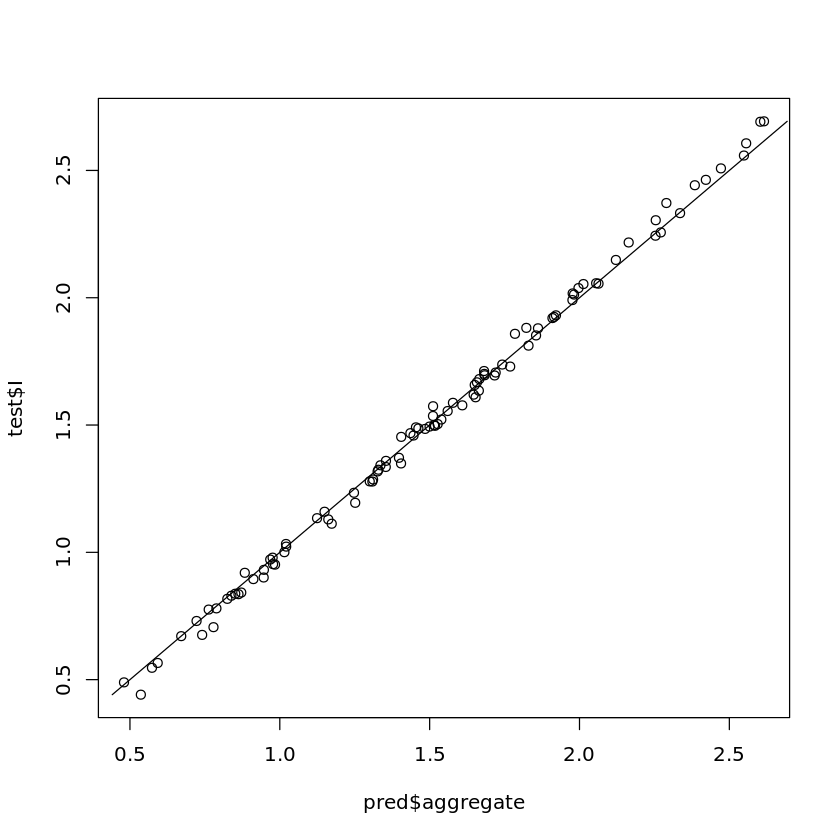

In [21]:
test$I <- test$A + test$B + test$C
print(test$I[1])
plot(pred$aggregate,test$I)
lines(test$I,test$I)

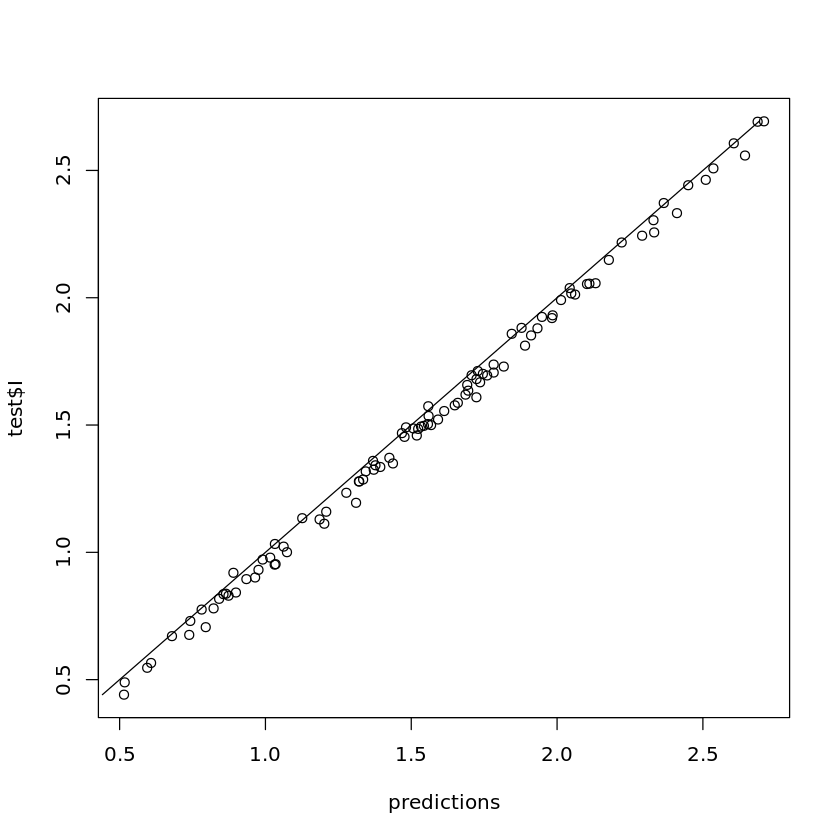

In [22]:
plot(predictions,test$I)
lines(test$I,test$I)